# Tugas
- Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

    - Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    - Gunakan model dengan kernel linier.

    - Gunakan model dengan kernel polynomial.

    - Gunakan model dengan kernel RBF.

    - Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

- Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [ ]:
# IMPORT ALL THE THINGS
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read EVERYTHING
df = pd.read_csv('/content/drive/MyDrive/Dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# Preprocessing the 'label' column
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Original labels:", y.unique())
print("Encoded labels:", y_encoded)
print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)

Original labels: ['male' 'female']
Encoded labels: [1 1 1 ... 0 0 0]
X shape: (3168, 20)
y_encoded shape: (3168,)


In [ ]:
# Import necessary modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

def train_evaluate_svm(X, y, test_size, kernel_type):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    if kernel_type == 'linear':
        model = SVC(kernel='linear', random_state=42)
    elif kernel_type == 'poly':
        model = SVC(kernel='poly', random_state=42)
    elif kernel_type == 'rbf':
        model = SVC(kernel='rbf', random_state=42)
    else:
        raise ValueError("Invalid kernel type specified")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Store results
results = []


split_ratios = [0.3, 0.2]
kernel_types = ['linear', 'poly', 'rbf']

for split_ratio in split_ratios:
    for kernel in kernel_types:
        accuracy = train_evaluate_svm(X, y_encoded, split_ratio, kernel)
        results.append({
            'Split Ratio': f'{int((1-split_ratio)*100)}:{int(split_ratio*100)}',
            'Kernel': kernel,
            'Accuracy': accuracy
        })

results_df = pd.DataFrame(results)
print(results_df)


  Split Ratio  Kernel  Accuracy
0       70:30  linear  0.920084
1       70:30    poly  0.511041
2       70:30     rbf  0.695058
3       80:20  linear  0.917981
4       80:20    poly  0.517350
5       80:20     rbf  0.694006


In [ ]:
from sklearn.preprocessing import LabelEncoder


X = df.drop('label', axis=1)
y = df['label']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Original labels:", y.unique())
print("Encoded labels:", y_encoded)
print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)

Original labels: ['male' 'female']
Encoded labels: [1 1 1 ... 0 0 0]
X shape: (3168, 20)
y_encoded shape: (3168,)


In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Combine
all_std_images_labels = train_std_img_list + test_std_img_list

# Histogram Extract
def extract_histogram_features(image, bins=32):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256]).flatten()
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256]).flatten()
    # Concatenate the histograms
    features = np.concatenate((hist_r, hist_g, hist_b))
    return features

X_hist_features = []
y_hist_labels = []

for img_array, label in all_std_images_labels:
    features = extract_histogram_features(img_array)
    X_hist_features.append(features)
    y_hist_labels.append(label)

X_hist = np.array(X_hist_features)
y_hist = np.array(y_hist_labels)

print(f"Shape of X_hist (features): {X_hist.shape}")
print(f"Shape of y_hist (labels): {y_hist.shape}")

# Split
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(
    X_hist, y_hist, test_size=0.2, random_state=42, stratify=y_hist
)

print(f"Shape of X_train_hist: {X_train_hist.shape}")
print(f"Shape of X_test_hist: {X_test_hist.shape}")

svm_rbf = SVC(kernel='rbf', random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

%time grid_search.fit(X_train_hist, y_train_hist)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Evaluate
best_svm_model = grid_search.best_estimator_
y_pred_hist = best_svm_model.predict(X_test_hist)
test_accuracy = accuracy_score(y_test_hist, y_pred_hist)

print(f"Test accuracy of the best RBF SVM model: {test_accuracy:.4f}")

Shape of X_hist (features): (400, 96)
Shape of y_hist (labels): (400,)
Shape of X_train_hist: (320, 96)
Shape of X_test_hist: (80, 96)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 85.6 ms, sys: 5.16 ms, total: 90.8 ms
Wall time: 721 ms

Best parameters found: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.5000
Test accuracy of the best RBF SVM model: 0.5000


In [ ]:
# Import necessary modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

def train_evaluate_svm(X, y, test_size, kernel_type):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Initialize SVM model with specified kernel
    if kernel_type == 'linear':
        model = SVC(kernel='linear', random_state=42)
    elif kernel_type == 'poly':
        model = SVC(kernel='poly', random_state=42)
    elif kernel_type == 'rbf':
        model = SVC(kernel='rbf', random_state=42)
    else:
        raise ValueError("Invalid kernel type specified")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Store results
results = []

split_ratios = [0.3, 0.2]
kernel_types = ['linear', 'poly', 'rbf']

for split_ratio in split_ratios:
    for kernel in kernel_types:
        accuracy = train_evaluate_svm(X, y_encoded, split_ratio, kernel)
        results.append({
            'Split Ratio': f'{int((1-split_ratio)*100)}:{int(split_ratio*100)}',
            'Kernel': kernel,
            'Accuracy': accuracy
        })

results_df = pd.DataFrame(results)
print(results_df)

  Split Ratio  Kernel  Accuracy
0       70:30  linear  0.920084
1       70:30    poly  0.511041
2       70:30     rbf  0.695058
3       80:20  linear  0.917981
4       80:20    poly  0.517350
5       80:20     rbf  0.694006


## Tugas Nomor 2
Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

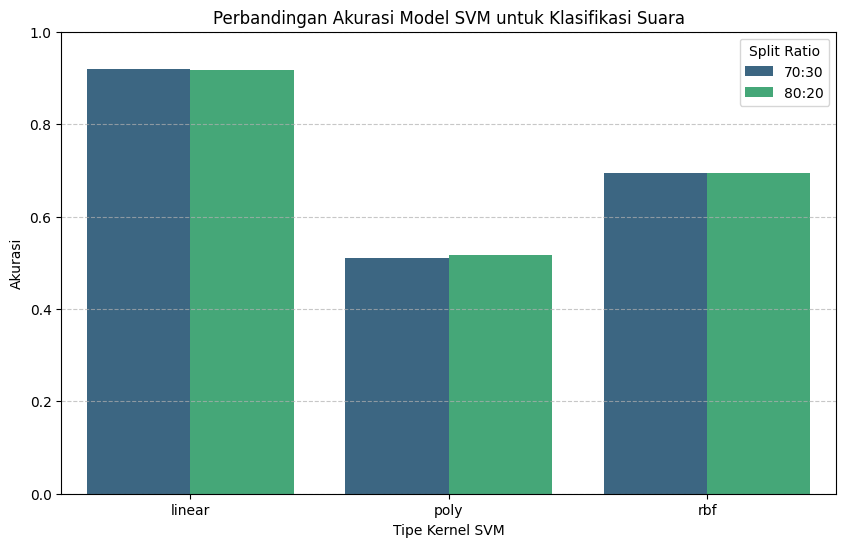

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='Accuracy', hue='Split Ratio', data=results_df, palette='viridis')
plt.title('Perbandingan Akurasi Model SVM untuk Klasifikasi Suara')
plt.xlabel('Tipe Kernel SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1) # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dari grafik di atas, kita dapat melihat perbandingan akurasi model SVM dengan berbagai tipe kernel (Linear, Poly, RBF) dan rasio split data (70:30 dan 80:20). Model dengan kernel Linear menunjukkan akurasi tertinggi, sedangkan kernel Polynomial memiliki akurasi terendah untuk dataset ini.

## Bagian Tugas 2

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Dataset/MLImage/training/"
test_dir = "/content/drive/MyDrive/Dataset/MLImage/test/"

In [ ]:
import cv2
import numpy as np

all_std_images_labels = train_std_img_list + test_std_img_list

def extract_histogram_features(image, bins=32):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256]).flatten()
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256]).flatten()
    features = np.concatenate((hist_r, hist_g, hist_b))
    return features

X_hist_features = []
y_hist_labels = []

for img_array, label in all_std_images_labels:
    features = extract_histogram_features(img_array)
    X_hist_features.append(features)
    y_hist_labels.append(label)

X_hist = np.array(X_hist_features)
y_hist = np.array(y_hist_labels)

print(f"Shape of X_hist (features): {X_hist.shape}")
print(f"Shape of y_hist (labels): {y_hist.shape}")

Shape of X_hist (features): (400, 96)
Shape of y_hist (labels): (400,)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(
    X_hist, y_hist, test_size=0.2, random_state=42, stratify=y_hist
)

print(f"Shape of X_train_hist: {X_train_hist.shape}")
print(f"Shape of X_test_hist: {X_test_hist.shape}")

svm_rbf = SVC(kernel='rbf', random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
%time grid_search.fit(X_train_hist, y_train_hist)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Shape of X_train_hist: (320, 96)
Shape of X_test_hist: (80, 96)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 90.6 ms, sys: 5.23 ms, total: 95.8 ms
Wall time: 735 ms

Best parameters found: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.5000


In [ ]:
from sklearn.metrics import accuracy_score

best_svm_model = grid_search.best_estimator_
y_pred_hist = best_svm_model.predict(X_test_hist)
test_accuracy = accuracy_score(y_test_hist, y_pred_hist)

print(f"Test accuracy of the best RBF SVM model: {test_accuracy:.4f}")

Test accuracy of the best RBF SVM model: 0.5000


### Visualisasi Rata-rata Fitur Histogram untuk Gambar Siang dan Malam

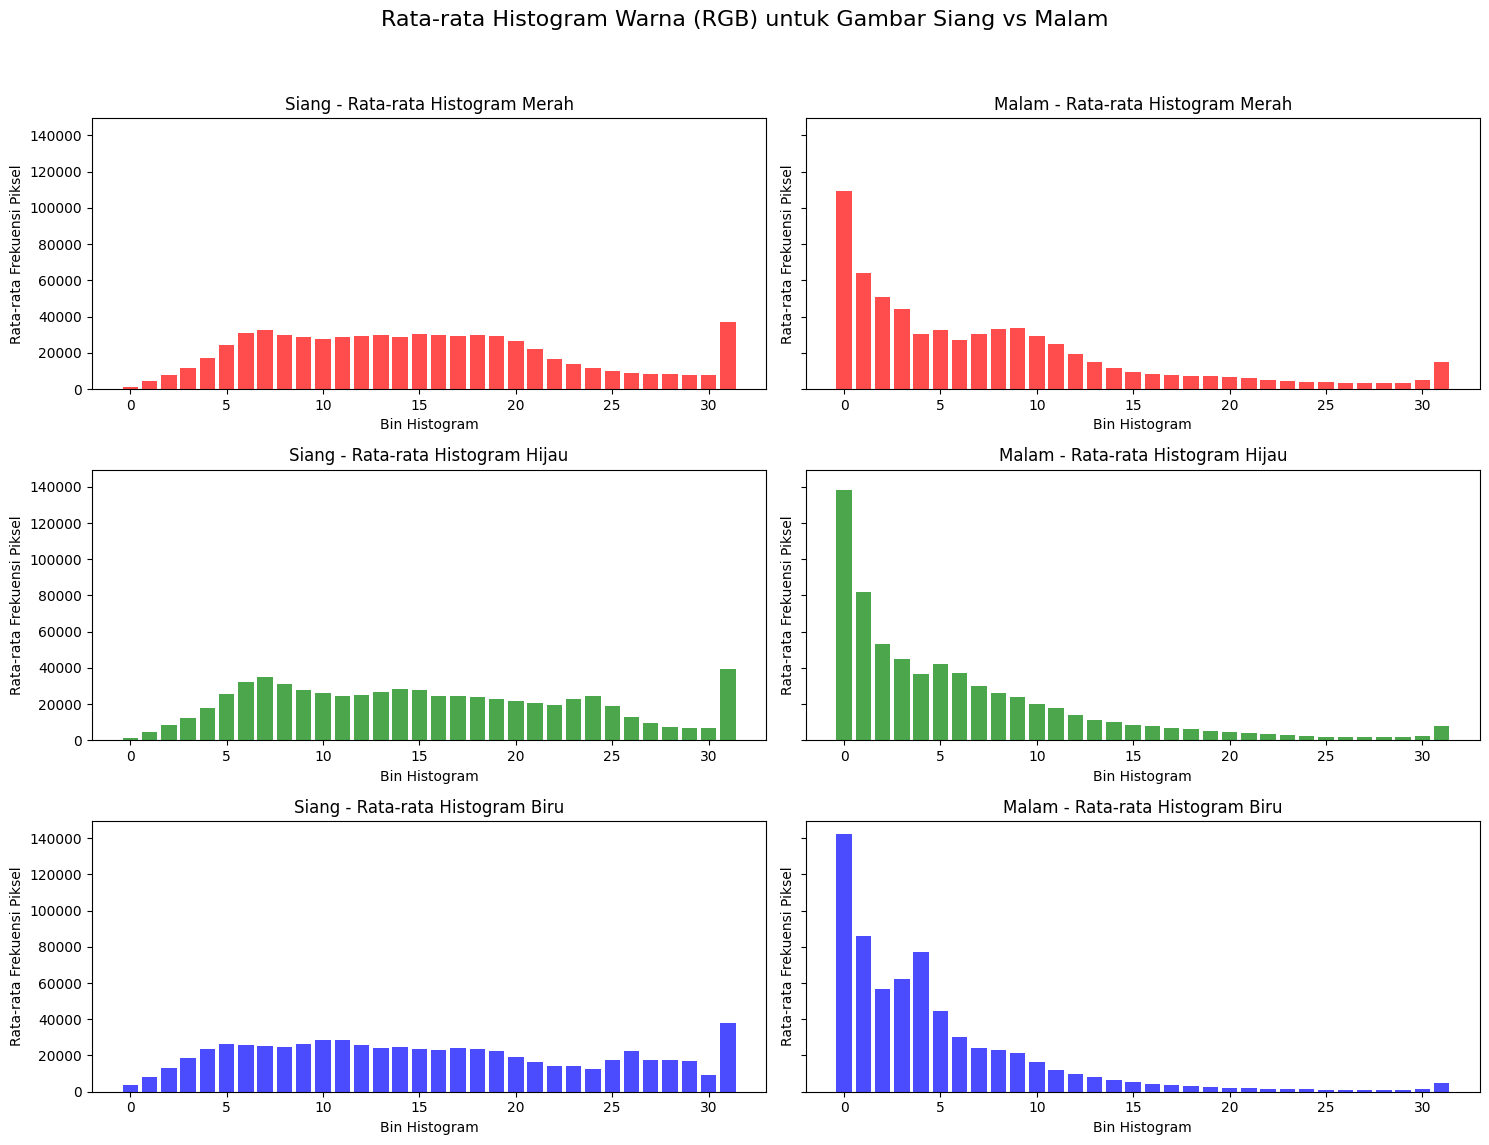

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_hist_day = X_hist[y_hist == 1]
X_hist_night = X_hist[y_hist == 0]

def get_avg_hist_channels(hist_features, bins=32):
    avg_hist = np.mean(hist_features, axis=0)
    avg_hist_r = avg_hist[0:bins]
    avg_hist_g = avg_hist[bins:2*bins]
    avg_hist_b = avg_hist[2*bins:3*bins]
    return avg_hist_r, avg_hist_g, avg_hist_b

avg_hist_r_day, avg_hist_g_day, avg_hist_b_day = get_avg_hist_channels(X_hist_day)
avg_hist_r_night, avg_hist_g_night, avg_hist_b_night = get_avg_hist_channels(X_hist_night)

bins_range = np.arange(32)

fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Rata-rata Histogram Warna (RGB) untuk Gambar Siang vs Malam', fontsize=16)

# Red
axes[0, 0].bar(bins_range, avg_hist_r_day, color='red', alpha=0.7)
axes[0, 0].set_title('Siang - Rata-rata Histogram Merah')
axes[0, 1].bar(bins_range, avg_hist_r_night, color='red', alpha=0.7)
axes[0, 1].set_title('Malam - Rata-rata Histogram Merah')

# Green
axes[1, 0].bar(bins_range, avg_hist_g_day, color='green', alpha=0.7)
axes[1, 0].set_title('Siang - Rata-rata Histogram Hijau')
axes[1, 1].bar(bins_range, avg_hist_g_night, color='green', alpha=0.7)
axes[1, 1].set_title('Malam - Rata-rata Histogram Hijau')

# Blue
axes[2, 0].bar(bins_range, avg_hist_b_day, color='blue', alpha=0.7)
axes[2, 0].set_title('Siang - Rata-rata Histogram Biru')
axes[2, 1].bar(bins_range, avg_hist_b_night, color='blue', alpha=0.7)
axes[2, 1].set_title('Malam - Rata-rata Histogram Biru')

for ax in axes.flat:
    ax.set_xlabel('Bin Histogram')
    ax.set_ylabel('Rata-rata Frekuensi Piksel')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari visualisasi histogram di atas dapat terlihat bagaimana distribusi intensitas warna (merah, hijau, biru) berbeda antara gambar 'siang' dan 'malam'.

*   **Gambar Siang (Day Images):** Cenderung memiliki distribusi piksel yang lebih merata atau lebih tinggi pada bin intensitas yang lebih terang (bin yang lebih tinggi), menunjukkan gambar yang lebih cerah secara keseluruhan.
*   **Gambar Malam (Night Images):** Cenderung memiliki distribusi piksel yang lebih tinggi pada bin intensitas yang lebih gelap (bin yang lebih rendah), menunjukkan gambar yang lebih gelap secara keseluruhan.

Perbedaan ini adalah dasar fitur histogram yang digunakan oleh model SVM untuk mencoba membedakan antara gambar siang dan malam.